In [1]:
import numpy as np
import matplotlib.pyplot as plt


class RecursiveLeastSquares:
    def __init__(self, A0, P0, x0, x1):
        self.A = [A0,]
        self.P = [P0,]
        self.error = []
        self.n = 0
        self.Phi = np.array([[0, x1, x0]])

    def predict(self, x, y, lmbd=1):
        self.Phi[0][0] = x
        
        P_u = self.P[self.n] @ self.Phi.T @ self.Phi @ self.P[self.n]
        P_d = lmbd + self.Phi @ self.P[self.n] @ self.Phi.T
        P = (self.P[self.n] - P_u * (1/P_d))/lmbd
        
        
        err = y - self.Phi @ self.A[self.n]
        correction = P @ self.Phi.T @ err
    
        A = self.A[self.n] + correction

        self.A.append(A)
        self.P.append(P)
        self.error.append(err)
        
        self.Phi[0][2] = self.Phi[0][1]
        self.Phi[0][1] = self.Phi[0][0]
        
        self.n += 1

In [2]:
N = 10000
N_array = np.arange(N)
time = np.linspace(0, 20*np.pi, N)
lmbd = np.arange(0.85, 0.95, 0.001)

X = np.random.random(N)+1

a0 = 1
a1 = 1 * np.sin(time)
a2 = -5
A = [a0, a1, a2]

V = np.zeros(N)
V[0] = X[0] * A[0]
V[1] = X[1] * A[0] + X[0] * A[1][1]
for i in range(2, N):
    V[i] = X[i] * A[0] + X[i-1] * A[1][i] + X[i-2] * A[2]

# odchylenie standardowe szumu
noise_stdev = 0.1
# szum z rozkładu normalnego
noise = noise_stdev * np.random.randn(N)

Y = V + noise

In [3]:
A0 = np.zeros(3)
P0 = 1000 * np.eye(3, 3)

In [4]:
Q = []
for l in lmbd:
    diff = 0
    RLS = RecursiveLeastSquares(A0, P0, X[0], X[1])
    for i in range(2, N):
        x = X[i]
        y = Y[i]
        RLS.predict(x, y, lmbd=l)
    a1_est = np.array(RLS.A)[:, 1]
    diff = np.sum(np.square(a1_est-a1[1:]))/N
    Q.append(diff)

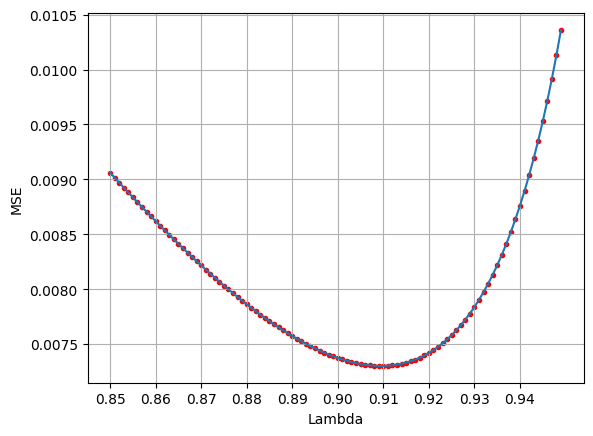

In [5]:
plt.figure()
plt.plot(lmbd, Q)
plt.scatter(lmbd, Q, marker='.', color='r')
plt.grid(True)
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.xticks(lmbd[::10])
plt.show()

In [6]:
lmbd = np.arange(0.8, 0.99, 0.01)
Q = []
for l in lmbd:
    diff = 0
    RLS = RecursiveLeastSquares(A0, P0, X[0], X[1])
    for i in range(2, N):
        x = X[i]
        y = Y[i]
        RLS.predict(x, y, lmbd=l)
    a1_est = np.array(RLS.A)[:, 1]
    diff = np.sum(np.square(a1_est-a1[1:]))/N
    Q.append(diff)

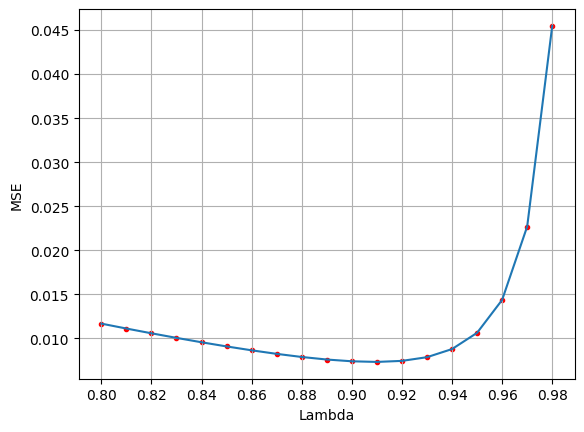

In [9]:
plt.figure()
plt.plot(lmbd, Q)
plt.scatter(lmbd, Q, marker='.', color='r')
plt.grid(True)
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.xticks(lmbd[::2])
plt.show()

In [12]:
lmbd = np.arange(0.6, 1.1, 0.01)
Q = []
for l in lmbd:
    diff = 0
    RLS = RecursiveLeastSquares(A0, P0, X[0], X[1])
    for i in range(2, N):
        x = X[i]
        y = Y[i]
        RLS.predict(x, y, lmbd=l)
    a1_est = np.array(RLS.A)[:, 1]
    diff = np.sum(np.square(a1_est-a1[1:]))/N
    Q.append(diff)

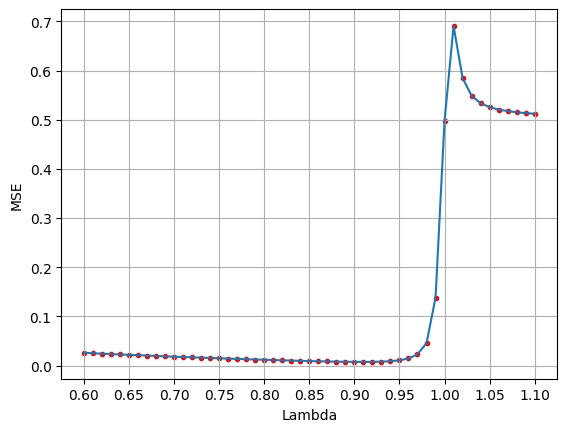

In [13]:
plt.figure()
plt.plot(lmbd, Q)
plt.scatter(lmbd, Q, marker='.', color='r')
plt.grid(True)
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.xticks(lmbd[::5])
plt.show()